In [1]:
import pandas as pd
import matplotlib as plt

In [3]:
df = pd.read_excel('../data/raw/Crisis_reports 2015-Present.xlsx')
# ../data_folder/data.csv

In [4]:
df.head()

,Behavioral Crisis Num,CAD Event ID,Disposition,Exhibiting Behavior (group),Offense/Incident Ind,Subject Age,Subject Gender,Subject Race,Techniques Used,UoF Indicator,Weapons Involved,Reported Date (Date)
0,43653,2015000159907,No Action Possible / Necessary,-,-,-1,-,-,-,N,-,2015-05-15
1,43719,2015000160408,Unable to Contact,-,-,-1,-,-,-,N,-,2015-05-16
2,43845,2015000160465,Resources Declined,-,-,-1,-,-,-,N,-,2015-05-16
3,43992,2015000159631,Geriatric Regional Assessment Team,-,-,-1,-,-,-,N,-,2015-05-15
4,44102,-1,Voluntary Committal,-,-,-1,-,-,-,N,-,2015-05-16


In [5]:
df.dtypes

Behavioral Crisis Num                   int64
CAD Event ID                            int64
Disposition                            object
Exhibiting Behavior (group)            object
Offense/Incident Ind                   object
Subject Age                             int64
Subject Gender                         object
Subject Race                           object
Techniques Used                        object
UoF Indicator                          object
Weapons Involved                       object
Reported Date (Date)           datetime64[ns]
dtype: object

In [4]:
# df.columns

In [6]:
df.loc[:,df.dtypes == object] = df.loc[:,df.dtypes == object].apply(lambda x: x.str.strip().str.replace('#NAME?', '-'))


<ipython-input-6-ffd2d72bc747>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df.loc[:,df.dtypes == object] = df.loc[:,df.dtypes == object].apply(lambda x: x.str.strip().str.replace('#NAME?', '-'))


In [7]:
df['Disposition'] = df['Disposition'].str.upper().str.replace (" / ", "/", regex = True)
df['Exhibiting Behavior (group)'] = df['Exhibiting Behavior (group)'].str.upper().str.replace ("BEHAVIOR – ", "", regex = True)
df['Exhibiting Behavior (group)'] = df['Exhibiting Behavior (group)'].str.replace (" / ", "/", regex = True)
df['Exhibiting Behavior (group)'] = df['Exhibiting Behavior (group)'].str.replace ("\xa0", "", regex = True)
df['Offense/Incident Ind'] = df['Offense/Incident Ind'].str.upper()
df['Techniques Used'] = df['Techniques Used'].str.upper()
df['UoF Indicator'] = df['UoF Indicator'].str.replace ("N", "NO", regex = True)
df['UoF Indicator'] = df['UoF Indicator'].str.replace ("Y", "YES", regex = True)
df["Weapons Involved"] = df["Weapons Involved"].str.upper()
df['Weapons Involved'] = df['Weapons Involved'].str.replace("HANDGUN", "FIREARM", regex = True)
df['Weapons Involved'] = df['Weapons Involved'].str.replace ("RIFLE", "FIREARM", regex = True)
df['Weapons Involved'] = df['Weapons Involved'].str.replace ("SHOTGUN", "FIREARM", regex = True)
df['Weapons Involved'] = df['Weapons Involved'].str.replace ("OTHER FIREARM", "FIREARM", regex = True)

In [8]:
df.head()

,Behavioral Crisis Num,CAD Event ID,Disposition,Exhibiting Behavior (group),Offense/Incident Ind,Subject Age,Subject Gender,Subject Race,Techniques Used,UoF Indicator,Weapons Involved,Reported Date (Date)
0,43653,2015000159907,NO ACTION POSSIBLE/NECESSARY,-,-,-1,-,-,-,NO,-,2015-05-15
1,43719,2015000160408,UNABLE TO CONTACT,-,-,-1,-,-,-,NO,-,2015-05-16
2,43845,2015000160465,RESOURCES DECLINED,-,-,-1,-,-,-,NO,-,2015-05-16
3,43992,2015000159631,GERIATRIC REGIONAL ASSESSMENT TEAM,-,-,-1,-,-,-,NO,-,2015-05-15
4,44102,-1,VOLUNTARY COMMITTAL,-,-,-1,-,-,-,NO,-,2015-05-16


In [12]:
df['Exhibiting Behavior (group)'].unique() #len 27 previously 19

array(['-', 'BEHAVIOR - BELLIGERENT', 'BEHAVIOR - DISORDERLY',
       'BEHAVIOR - HALLUCINATIONS/DELUSIONS',
       'BEHAVIOR - NEGLECT/SELF CARE',
       'BEHAVIOR - OUT OF TOUCH WITH REALITY', 'BEHAVIOR - PARANOID',
       'BEHAVIOR - SUICIDE THREAT/ATTEMPT',
       'BEHAVIOR - UNUSUALLY FRIGHTENED/SCARED',
       'BELLIGERENT/UNCOOPERATIVE', 'BIZARRE/UNUSUAL',
       'COOPERATIVE/ATTENTIVE', 'DISORDERLY/DISRUPTIVE',
       'DISORGANIZED SPEECH/COMMUNICATION', 'DISORIENTATION/CONFUSION',
       'HALLUCINATIONS/DELUSIONS', 'HOPELESS/DEPRESSED', 'MANIC',
       'NEGLECT/SELF CARE', 'OTHER', 'OUT OF TOUCH WITH REALITY',
       'PARANOID', 'PHYSICALLY THREATENING/AGGRESSIVE',
       'SUICIDE BY COP (SBC)', 'SUICIDE THREAT/ATTEMPT',
       'UNUSUALLY FRIGHTENED/SCARED', 'VERBALLY THREATENING/AGGRESSIVE'],
      dtype=object)

In [13]:
df['Disposition'].unique()

array(['NO ACTION POSSIBLE/NECESSARY', 'UNABLE TO CONTACT',
       'RESOURCES DECLINED', 'GERIATRIC REGIONAL ASSESSMENT TEAM',
       'VOLUNTARY COMMITTAL', 'MOBILE CRISIS TEAM', 'CHRONIC COMPLAINT',
       '-', 'SUBJECT ARRESTED', 'SHELTER TRANSPORT',
       'EMERGENT DETENTION/ITA', 'CRISIS CLINIC',
       'MENTAL HEALTH AGENCY OR CASE MANAGER NOTIFIED',
       'DRUG/ALCOHOL TREATMENT REFERRAL', 'DMHP REFERRAL',
       'MCT (MOBILE CRISIS TEAM)', 'ARRESTED (REQUIRES ARREST REPORT)',
       'RESOURCES OFFERED/DECLINED', 'OTHER',
       'CSC/CDF (CRISIS SOLUTION CENTER/CRISIS DIVERSION FACILITY)',
       'CASE MANAGER/MH AGENCY NOTIFIED', 'COURTESY TRANSPORT', 'DETOX',
       'SOCIAL SERVICE/ALCOHOL AND DRUG/TREATMENT REFERRAL',
       'DMHP/REFERRAL (DCR)', 'CRISIS CLINIC (CRISIS CONNECTIONS)',
       'SPRUCE STREET', 'CRISIS RESPONSE BULLETIN REFERENCED', 'SHELTER',
       "CCORS (CHILDREN'S CRISIS OUTREACH RESPONSE SYSTEM)"], dtype=object)

In [15]:
dd = df['Disposition'].drop_duplicates() #len() 30 still 30
dd.unique()

array(['NO ACTION POSSIBLE/NECESSARY', 'UNABLE TO CONTACT',
       'RESOURCES DECLINED', 'GERIATRIC REGIONAL ASSESSMENT TEAM',
       'VOLUNTARY COMMITTAL', 'MOBILE CRISIS TEAM', 'CHRONIC COMPLAINT',
       '-', 'SUBJECT ARRESTED', 'SHELTER TRANSPORT',
       'EMERGENT DETENTION/ITA', 'CRISIS CLINIC',
       'MENTAL HEALTH AGENCY OR CASE MANAGER NOTIFIED',
       'DRUG/ALCOHOL TREATMENT REFERRAL', 'DMHP REFERRAL',
       'MCT (MOBILE CRISIS TEAM)', 'ARRESTED (REQUIRES ARREST REPORT)',
       'RESOURCES OFFERED/DECLINED', 'OTHER',
       'CSC/CDF (CRISIS SOLUTION CENTER/CRISIS DIVERSION FACILITY)',
       'CASE MANAGER/MH AGENCY NOTIFIED', 'COURTESY TRANSPORT', 'DETOX',
       'SOCIAL SERVICE/ALCOHOL AND DRUG/TREATMENT REFERRAL',
       'DMHP/REFERRAL (DCR)', 'CRISIS CLINIC (CRISIS CONNECTIONS)',
       'SPRUCE STREET', 'CRISIS RESPONSE BULLETIN REFERENCED', 'SHELTER',
       "CCORS (CHILDREN'S CRISIS OUTREACH RESPONSE SYSTEM)"], dtype=object)

Text(0.5, 1.0, 'Cer')

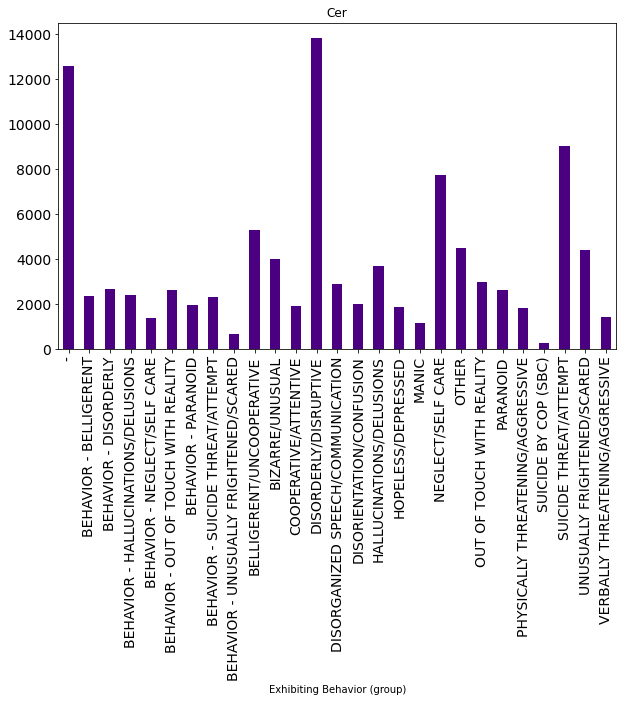

In [16]:
plot_bar = df.groupby(['Exhibiting Behavior (group)'])['Disposition'].count()
# plt.bar(df, dd, color ='b', width = barWidth,
        # edgecolor ='grey', label ='CSE')
ax = plot_bar.plot(kind = 'bar', figsize = (10, 6), color= 'indigo', fontsize=14)
ax.set_title('Cer')

In [17]:
df["Exhibiting Behavior (group)"].value_counts()

DISORDERLY/DISRUPTIVE                     13795
-                                         12575
SUICIDE THREAT/ATTEMPT                     8999
NEGLECT/SELF CARE                          7713
BELLIGERENT/UNCOOPERATIVE                  5274
OTHER                                      4492
UNUSUALLY FRIGHTENED/SCARED                4371
BIZARRE/UNUSUAL                            3993
HALLUCINATIONS/DELUSIONS                   3677
OUT OF TOUCH WITH REALITY                  2975
DISORGANIZED SPEECH/COMMUNICATION          2881
BEHAVIOR - DISORDERLY                      2645
PARANOID                                   2625
BEHAVIOR - OUT OF TOUCH WITH REALITY       2614
BEHAVIOR - HALLUCINATIONS/DELUSIONS        2396
BEHAVIOR - BELLIGERENT                     2361
BEHAVIOR - SUICIDE THREAT/ATTEMPT          2314
DISORIENTATION/CONFUSION                   1999
BEHAVIOR - PARANOID                        1923
COOPERATIVE/ATTENTIVE                      1908
HOPELESS/DEPRESSED                      